In [97]:
# k Means Clustering in a Mathematical approach

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

print('Max value of df''s first column(x) = ', max(df['x']) )
print('Max value of df''s second column(x) = ', max(df['y']) )

np.random.seed(200)
# Assuming 3 clusters
k = 3

# Generate 3 random ordered pairs (x, y) to act as centroids < 80 [Q. why 80? Ans. The values we took into df are < 80]
# I guess, I can replace 80 with max(df['x'])+1, max(df['y'])+1 as randint generates 1 lower than the upper value
# i.e. randint(low, high) generates random integer which includes 'low' and excludes 'high'
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}

Max value of dfs first column(x) =  72
Max value of dfs second column(x) =  70


In [98]:
df

,x,y
0,12,39
1,20,36
2,28,30
3,18,52
4,29,54
5,33,46
6,24,55
7,45,59
8,45,63
9,52,70


In [99]:
centroids

{1: [26, 16], 2: [68, 42], 3: [55, 76]}

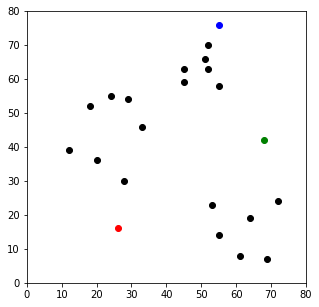

In [100]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1:'r', 2:'g', 3:'b'}

for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i]) # i.e. plt.scatter(centroids[i][0], centroids[i][1], color=colmap[i])

plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [127]:
# For every point, check which centroid is closest and assign the centroid's color to the point

def assignment(df, centroids):
    for i in centroids.keys():
        df['DistanceFromCentroid_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2 + (df['y'] - centroids[i][1]) ** 2
            )
        )
    
    # Names of columns in dataframe for centroid distance
    centroid_distance_cols = ['DistanceFromCentroid_{}'.format(i) for i in centroids.keys()]
    print("Names of centroid columns =", centroid_distance_cols)

    # Pick 'closest column' and fill the centroid's name in the column 'closest'
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1) 
    
    # Strip out the column name but retain column number from values in the column 'closest'
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('DistanceFromCentroid_')))
    
    # Fill 'color' column with respective color by matching closest number with colormap
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
df   

Names of centroid columns = ['DistanceFromCentroid_1', 'DistanceFromCentroid_2', 'DistanceFromCentroid_3']


,x,y,DistanceFromCentroid_1,DistanceFromCentroid_2,DistanceFromCentroid_3,closest,color
0,12,39,12.714286,55.408834,45.033629,1,r
1,20,36,9.231711,46.891423,40.472556,1,r
2,28,30,15.271689,37.141247,39.799846,1,r
3,18,52,9.200710,57.214266,33.892395,1,r
4,29,54,10.951656,50.673519,22.913485,1,r
5,33,46,9.677451,42.076980,24.159769,1,r
6,24,55,10.444215,54.803943,27.252421,1,r
7,45,59,25.952075,46.516723,6.508541,3,b
8,45,63,28.371443,50.250760,5.002777,3,b
9,52,70,38.248383,55.143500,7.120003,3,b


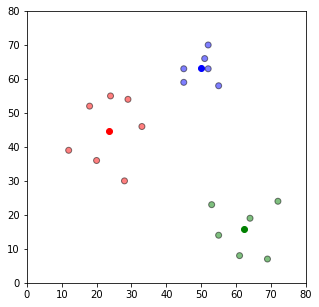

In [128]:
# Show the graph with the colors in effect
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')

for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i]) # i.e. plt.scatter(centroids[i][0], centroids[i][1], color=colmap[i])

plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [129]:
# Compute new centroids of the clusters
import copy
old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

print("Initial Centroids are ", centroids)
centroids = update(centroids)
print("Updated Centroids are ", centroids)

Initial Centroids are  {1: [23.428571428571427, 44.57142857142857], 2: [62.333333333333336, 15.833333333333334], 3: [50.0, 63.166666666666664]}
Updated Centroids are  {1: [23.428571428571427, 44.57142857142857], 2: [62.333333333333336, 15.833333333333334], 3: [50.0, 63.166666666666664]}


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


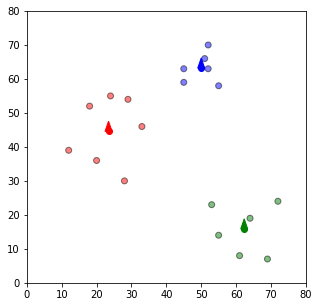

In [130]:
# Show the graph with the updated centroids in effect
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')

# updated centroids
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i]) # i.e. plt.scatter(centroids[i][0], centroids[i][1], color=colmap[i])

plt.xlim(0, 80)
plt.ylim(0, 80)
ax = plt.axes()
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])

plt.show()

Names of centroid columns = ['DistanceFromCentroid_1', 'DistanceFromCentroid_2', 'DistanceFromCentroid_3']


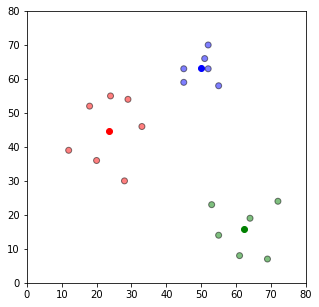

In [132]:
# Repeat the process of computing new centroid, finding closest points till there is no change in the centroids
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()